In [1]:
import data
import structures
import transformations as trans
import nibabel as nib
import torch as t
import os
import numpy as np
import open3d as o3d
import pytorch3d as p3

read nifti format and return image, affine and zooms as torch tensor, show slices (not in world coordinates)

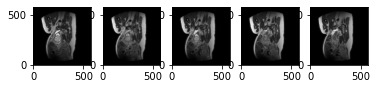

In [10]:
filename = "iFIND00472_iFIND2_201901111210_PHILIPSJ2LF9B9_101_PIH1HR_Survey_32SENSE.s3.nii.gz"
t_image, t_affine, zooms = data.nii_to_torch(filename)
data.show_stack(t_image)

Create stack object

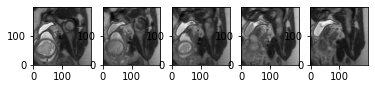

In [11]:
t_image_red = t_image[200:400,200:400,:]
data.show_stack(t_image_red)

In [12]:
beta = 0.01
first_stack = structures.stack(t_image_red,t_affine, beta)

create target volume from desired geometry and the number of voxels in each direction

In [13]:
corners = first_stack.corners()
corners

tensor([[ 82.8143, 287.5000],
        [283.3857, 287.5000],
        [  2.0000,  47.2273]], dtype=torch.float64)

In [14]:
geometry = corners
n_voxels = t.tensor([80,5,80])
target = structures.volume(geometry,n_voxels)

create slice and target volume

In [15]:
target.register_stack(first_stack)

slice 0 registered
slice 1 registered
slice 2 registered
slice 3 registered
slice 4 registered


In [16]:
nft_img = data.torch_to_nii(target.X, target.affine)
filename = 'first_nifti_target_jupyter'
data.save_nifti(nft_img,filename)

In [17]:
[l_x,l_y,l_z] = geometry[:,0] - geometry[:,1]
x_lin, y_lin, z_lin = t.linspace(geometry[0,0],geometry[0,1],n_voxels[0]), t.linspace(geometry[1,0],geometry[1,1], n_voxels[1]), t.linspace(geometry[2,0],geometry[2,1], n_voxels[2])
x_grid, y_grid, z_grid = t.meshgrid(x_lin, y_lin, z_lin)
#coordinates
coordinates = t.stack((t.flatten(x_grid),t.flatten(y_grid),t.flatten(z_grid)),dim = 0)
#1 for "voxel structure" 0 for initial intensity value
add_on = t.tensor([[1],[0]]).repeat(1,coordinates.shape[1])
voxels = t.cat((coordinates,add_on),0)

In [54]:
resolution = 9
geometry = t.tensor([[0,10],[-20,-5],[10,30]])
[l_x,l_y,l_z] = geometry[:,0] - geometry[:,1]

In [55]:
n_voxels = t.ceil(t.abs(t.div(t.tensor([l_x,l_y,l_z]), resolution))).int()
x_lin, y_lin, z_lin = t.linspace(geometry[0,0],geometry[0,1],n_voxels[0]), t.linspace(geometry[1,0],geometry[1,1], n_voxels[1]), t.linspace(geometry[2,0],geometry[2,1], n_voxels[2])

In [56]:
x_grid, y_grid, z_grid = t.meshgrid(x_lin, y_lin, z_lin)
#coordinates
coordinates = t.stack((t.flatten(x_grid),t.flatten(y_grid),t.flatten(z_grid)),dim = 0)
#1 for "voxel structure" 0 for initial intensity value
add_on = t.tensor([[1],[0]]).repeat(1,coordinates.shape[1])
voxels = t.cat((coordinates,add_on),0)

In [57]:
voxels.shape

torch.Size([5, 12])

In [58]:
voxels

tensor([[  0.,   0.,   0.,   0.,   0.,   0.,  10.,  10.,  10.,  10.,  10.,  10.],
        [-20., -20., -20.,  -5.,  -5.,  -5., -20., -20., -20.,  -5.,  -5.,  -5.],
        [ 10.,  20.,  30.,  10.,  20.,  30.,  10.,  20.,  30.,  10.,  20.,  30.],
        [  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])